# Feature_engineering_polynomial_regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision = 2)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


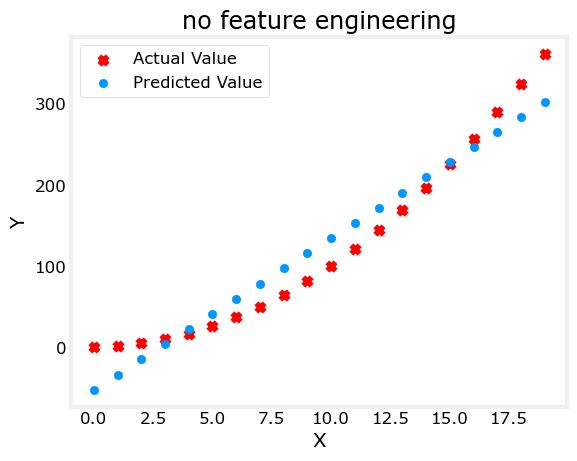

In [5]:
#create target data
#for the polynomial data y = x^2 + 1
x = np.arange(0,20,1)
y = 1 + x**2

X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations = 1000, alpha = 1e-2)

plt.scatter(x, y, marker = 'x', c= 'r', label = "Actual Value")
plt.title("no feature engineering")

plt.scatter(x, X@model_w + model_b, label = 'Predicted Value')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()



In [6]:
#lets add feature engineering with x0^2 insted of x
#the equation will look like
#y = w0x0^2 + b
#create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

#enginner features
X = X**2


Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


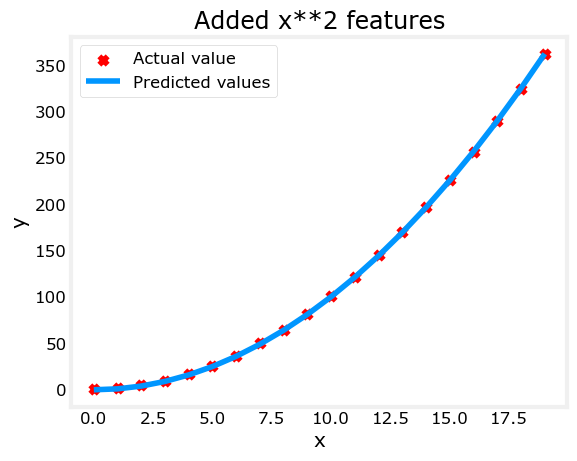

In [8]:
X = X.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-5)

plt.scatter(x, y, marker = 'x', c = 'r', label = "Actual value")
plt.title("Added x**2 features")
plt.plot(x, np.dot(X, model_w) + model_b, label = "Predicted values")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [9]:
#create target data
x = np.arange(0, 20, 1)
y = x**2

#enginner features
X = np.c_[x, x**2, x**3] # <--- enginnering features added



Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


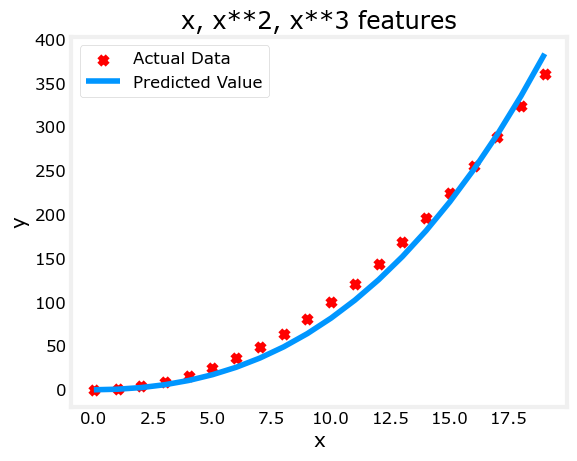

In [11]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-7)

plt.scatter(x, y, marker = 'x', label = "Actual Data", c = 'r')
plt.title("x, x**2, x**3 features")

plt.plot(x, X@model_w + model_b, label = 'Predicted Value')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

In [14]:
#above the model is of the form 0.08x + 0.54x^2 + 0.03x^3 + 0.0106


#create target data for an alternate view
x = np.arange(0, 20, 1)
y = x**2

#engineer features
X = np.c_[x, x**2, x**3]
X_features = ['x', 'x^2', 'x^3']

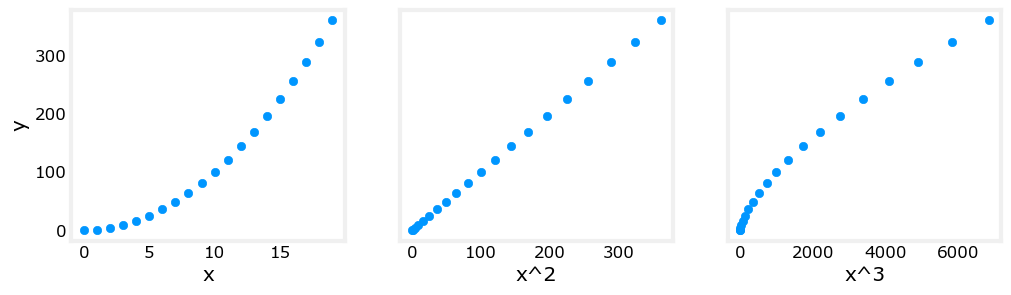

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (12,3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y)
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("y")
plt.show()

In [19]:
#create target data
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print(f"Peak to peak value by column in Raw is: X:{np.ptp(X, axis = 0)}")

#add mean normalization
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column is Normalized X:{np.ptp(X, axis = 0)}")

Peak to peak value by column in Raw is: X:[  19  361 6859]
Peak to Peak range by column is Normalized X:[3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


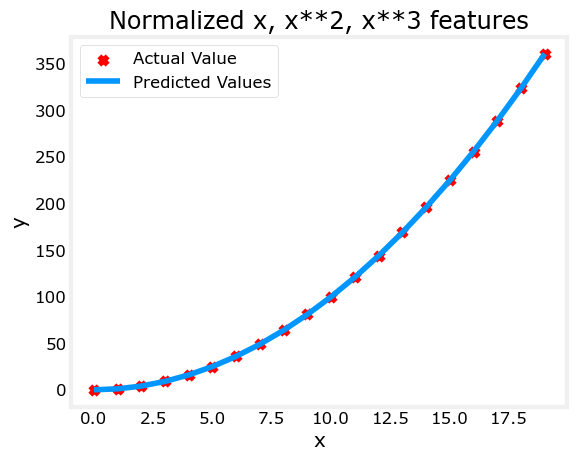

In [22]:
#with the agressive value of alpha
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations = 100000, alpha = 1e-1)

plt.scatter(x, y, marker = 'x', c = 'r', label = "Actual Value")
plt.title("Normalized x, x**2, x**3 features")

plt.plot(x, X@model_w + model_b, label = "Predicted Values")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()